In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
plt.rcParams['font.family'] = 'DejaVu Sans'

In [5]:
file_name = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

فایل 'WA_Fn-UseC_-Telco-Customer-Churn.csv' با موفقیت خوانده و پاکسازی شد.
در حال رسم ۳ نمودار...


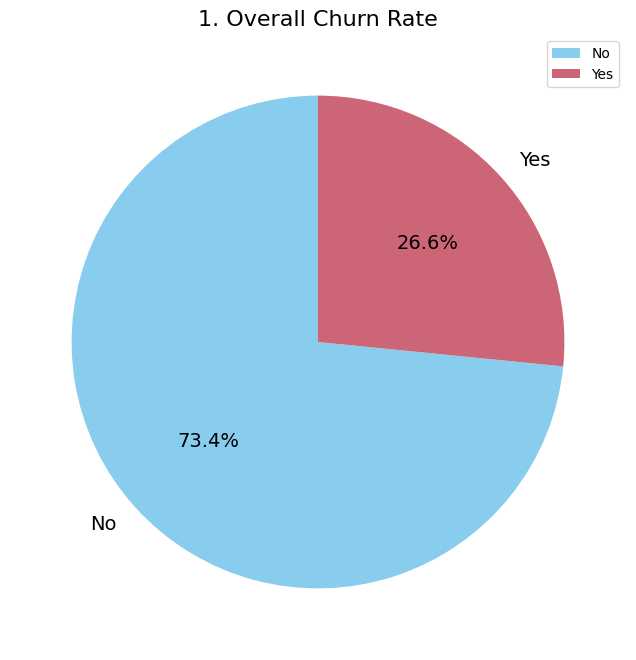

C:\Users\south\AppData\Local\Temp\ipykernel_14672\3596532825.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='Contract', y='Churn_numeric', data=contract_churn, palette='Reds_r')


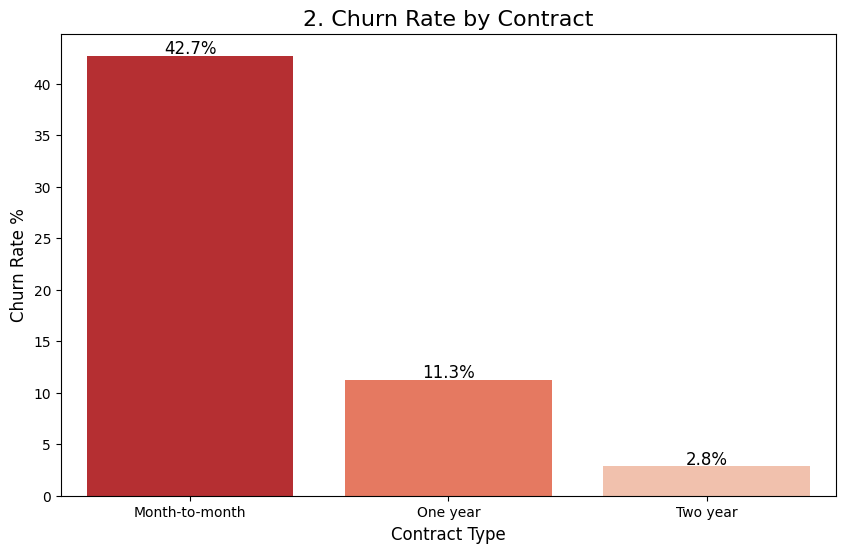

C:\Users\south\AppData\Local\Temp\ipykernel_14672\3596532825.py:43: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn'] == 'No']['MonthlyCharges'], label='Churn: No', shade=True, color='#88ccee')
C:\Users\south\AppData\Local\Temp\ipykernel_14672\3596532825.py:44: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn'] == 'Yes']['MonthlyCharges'], label='Churn: Yes', shade=True, color='#cc6677')


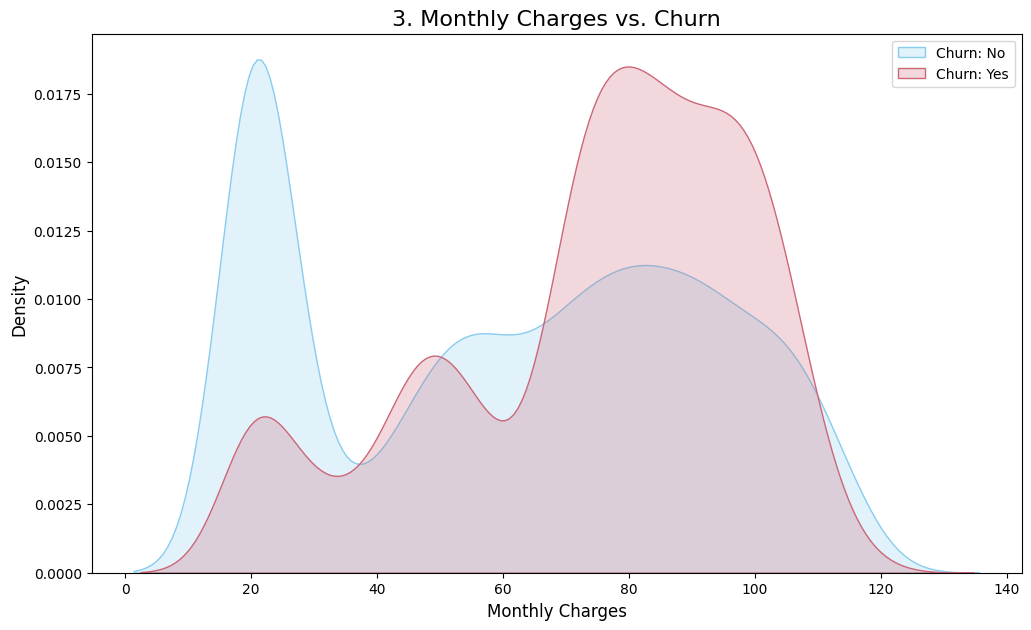

--- کار تمام شد. ۳ نمودار رسم شدند. ---


In [17]:
try:
    df = pd.read_csv(file_name)

    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df.dropna(subset=['TotalCharges'], inplace=True)
    df['Churn_numeric'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

    print(f"فایل '{file_name}' با موفقیت خوانده و پاکسازی شد.")
    print("در حال رسم ۳ نمودار...")

    churn_counts = df['Churn'].value_counts()
    colors = ['#88ccee', '#cc6677'] 
    
    plt.figure(figsize=(8, 8))
    plt.pie(churn_counts, 
            labels=churn_counts.index, 
            autopct='%1.1f%%', 
            startangle=90,
            colors=colors,
            textprops={'fontsize': 14})
    plt.title('1. Overall Churn Rate', fontsize=16)
    plt.legend()
    plt.savefig('1_pie_overall_churn.png')
    plt.show() 

    contract_churn = df.groupby('Contract')['Churn_numeric'].mean() * 100
    contract_churn = contract_churn.reset_index().sort_values(by='Churn_numeric', ascending=False)
    
    plt.figure(figsize=(10, 6))
    ax1 = sns.barplot(x='Contract', y='Churn_numeric', data=contract_churn, palette='Reds_r')
    plt.title('2. Churn Rate by Contract', fontsize=16)
    plt.ylabel('Churn Rate %', fontsize=12)
    plt.xlabel('Contract Type', fontsize=12)
    
    for p in ax1.patches:
        ax1.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                     textcoords='offset points')
    plt.savefig('2_bar_contract_churn.png')
    plt.show() 

    plt.figure(figsize=(12, 7))
    sns.kdeplot(df[df['Churn'] == 'No']['MonthlyCharges'], label='Churn: No', shade=True, color='#88ccee')
    sns.kdeplot(df[df['Churn'] == 'Yes']['MonthlyCharges'], label='Churn: Yes', shade=True, color='#cc6677')
    plt.title('3. Monthly Charges vs. Churn', fontsize=16)
    plt.xlabel('Monthly Charges', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()
    plt.savefig('3_density_monthlycharges_churn.png')
    plt.show() 
    
    print("--- کار تمام شد. ۳ نمودار رسم شدند. ---")

except FileNotFoundError:
    print(f"!!! خطا: فایل '{file_name}' پیدا نشد.")
    print(f"مطمئن شو که نام فایل '{file_name}' است.")
except Exception as e:
    print(f"یک خطای غیرمنتظره رخ داد: {e}")